In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv')

                                                   Name  Global_Sales  \
0                                            Wii Sports         82.74   
1                                     Super Mario Bros.         40.24   
2                                        Mario Kart Wii         35.82   
3                                     Wii Sports Resort         33.00   
4                              Pokemon Red/Pokemon Blue         31.37   
...                                                 ...           ...   
16593                Woody Woodpecker in Crazy Castle 5          0.01   
16594                     Men in Black II: Alien Escape          0.01   
16595  SCORE International Baja 1000: The Official Game          0.01   
16596                                        Know How 2          0.01   
16597                                  Spirits & Spells          0.01   

       NA_Sales  JP_Sales  Cluster  
0         41.49      3.77        1  
1         29.08      6.81        1  
2         15

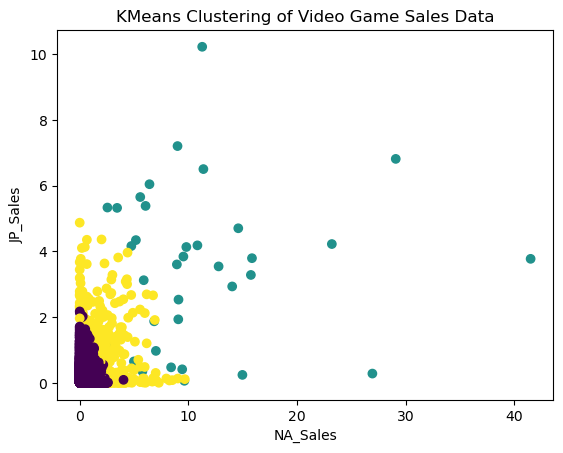

In [15]:
features = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

print(df[['Name', 'Global_Sales', 'NA_Sales', 'JP_Sales', 'Cluster']])

plt.scatter(df['NA_Sales'], df['JP_Sales'], c=df['Cluster'], cmap='viridis')
plt.xlabel('NA_Sales')
plt.ylabel('JP_Sales')
plt.title('KMeans Clustering of Video Game Sales Data')
plt.show()

In [16]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[-0.10811531 -0.11853071 -0.08163563 -0.10565661]
 [13.40958042 12.49675895 11.10294183 11.49443197]
 [ 2.23475457  2.58685499  1.62674738  2.28385634]]


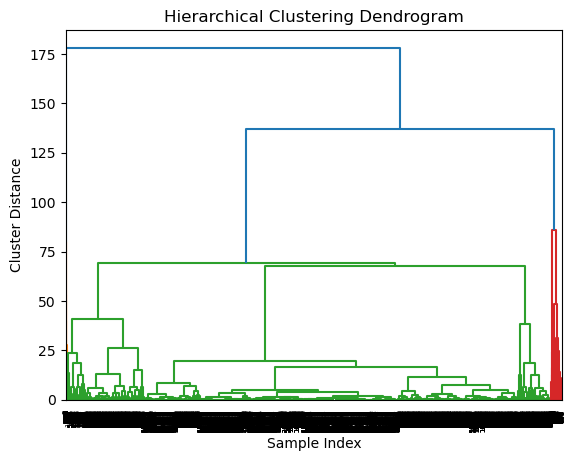

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

features = df[['NA_Sales', 'EU_Sales', 'JP_Sales']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

agg_cluster = AgglomerativeClustering(n_clusters=3)
df['Cluster'] = agg_cluster.fit_predict(features_scaled)

print(df[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Cluster']])

linkage_matrix = linkage(features_scaled, "ward")
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

                                                   Name  NA_Sales  \
0                                            Wii Sports     41.49   
1                                     Super Mario Bros.     29.08   
2                                        Mario Kart Wii     15.85   
3                                     Wii Sports Resort     15.75   
4                              Pokemon Red/Pokemon Blue     11.27   
...                                                 ...       ...   
16593                Woody Woodpecker in Crazy Castle 5      0.01   
16594                     Men in Black II: Alien Escape      0.01   
16595  SCORE International Baja 1000: The Official Game      0.00   
16596                                        Know How 2      0.00   
16597                                  Spirits & Spells      0.01   

       Global_Sales  JP_Sales  Other_Sales  Cluster  
0             82.74      3.77         8.46       -1  
1             40.24      6.81         0.77       -1  
2        

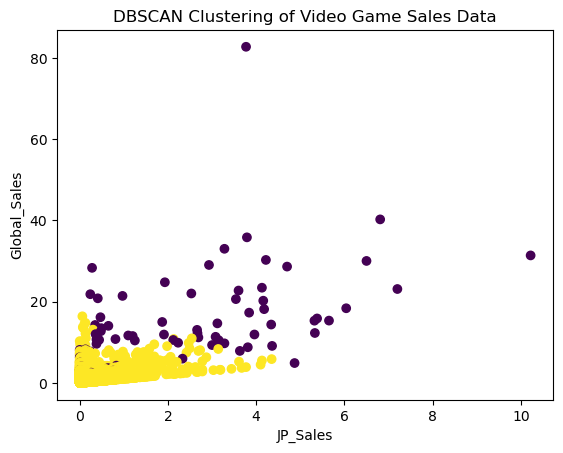

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('vgsales.csv')

features = df[['NA_Sales', 'Global_Sales', 'JP_Sales', 'Other_Sales']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

dbscan = DBSCAN(eps=2, min_samples=5)
df['Cluster'] = dbscan.fit_predict(features_scaled)

print(df[['Name', 'NA_Sales', 'Global_Sales', 'JP_Sales', 'Other_Sales', 'Cluster']])

plt.scatter(df['JP_Sales'], df['Global_Sales'], c=df['Cluster'], cmap='viridis')
plt.xlabel('JP_Sales')
plt.ylabel('Global_Sales')
plt.title('DBSCAN Clustering of Video Game Sales Data')
plt.show()

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('vgsales.csv')

features = df[['NA_Sales', 'Global_Sales', 'JP_Sales', 'Other_Sales']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=30, random_state=42)
labels_true = df['Genre']
labels_pred = kmeans.fit_predict(features_scaled)

nmi_score = normalized_mutual_info_score(labels_true, labels_pred)

print("Normalized Mutual Information Score:", nmi_score)

Normalized Mutual Information Score: 0.03247877454466675


In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('vgsales.csv')

features = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    
    silhouette_avg = silhouette_score(features_scaled, labels, metric='euclidean')
    
    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

Number of Clusters: 2, Silhouette Score: 0.9382439669223989
Number of Clusters: 3, Silhouette Score: 0.841665417572301
Number of Clusters: 4, Silhouette Score: 0.8324063278560059
Number of Clusters: 5, Silhouette Score: 0.8125615138667593
